# Лабораторная работа №4
## Краевая задача для стационарного уравнения теплопроводности с периодическими коэффициентами

### Вариант 2
Гарина Ольга, Б04-901

### Цель: 
решить аналитически модельную задачу, численно решить модельную задачу с заданной степенью точности, численно решить задачу с переменными коэффициентами, проверить сходимость

$$\frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x)$$ <br>
$$u(0 + 0) = u(1 - 0)$$ <br>
$$k(0 + 0)u'(0 + 0) = k(1 - 0)u'(1 - 0)$$

$$k(x) = cos^{2}2\pi x + 1$$ <br>
$$q(x) = 1$$ <br>
$$f(x) = sin2\pi x$$

### Модельная задача с постоянными коэффициентами <br>

$$\bar{k}(x) = 2$$ <br>
$$\bar{q}(x) = 1$$ <br>
$$\bar{f}(x) = sin2\pi x$$

### Сформулируем вспомогательную задачу с постоянными коэффициентами и с той же точностью e, что и в задаче

$$\frac{d}{dx}[\bar{k}(x)\frac{du}{dx}] - \bar{q}(x)u = -\bar{f}(x)$$ <br>
$$u(0 + 0) = u(1 - 0)$$ <br>
$$u'(0 + 0) = u'(1 - 0)$$

Аналитическое решение модельной задачи состоит из общего и частного решения<br>
Общее решение : $$C_{1}exp(\lambda_{1}x) + C_{2}exp(\lambda_{2}x)$$<br> $$\lambda = \pm\frac{\bar{q}}{\bar{k}}$$

Функцию $\bar{f}(x)$ можно представить в общем виде как $\bar{f}(x) = \mu +\nu F(x)$, где F(x) <br>
$$\frac{d^{2}F(x)}{dx^{2}} = -4\pi^{2} F(x); F(0) = F(1); F'(0) = F'(1)$$


### Решение
$$F(x) = H_{1}sin(2\pi x) + H_{2}cos(2\pi x)$$ <br>
$$\bar{f} = F(x); \mu = 0; \nu = 1; H_{1} = 1; H_{2} = 0$$

Тогда частное решение можно представить в виде<br>
$$u_{\text{частн}} = \frac{\mu}{\bar{q}} + \frac{\nu}{4\pi^{2}\bar{k} + \bar{q}}F(x)$$


$$u = \frac{1}{4\pi^{2}\bar{k} + \bar{q}}sin(2\pi x)$$

В общем случае $\lambda_{1} \neq \lambda_{2}$, получаем $C_{1} = C_{2} = 0$, и решение будет только частное

Введем в области интегрирования на [0,1] равномерную сетку. Для построения разностной задачи в каждой узле сетки заменим вторую производную в диф. уравнении  для модельной задачи конечно-разностным соотношением. В итоге получим 2 системы

$$\bar{k}\frac{u_{l+1} - 2u_{l} + u_{l-1}}{h^{2}} - \bar{q}u_{l} = -f_{l}; l = 1:L-1$$ <br>
$$\bar{k}\frac{u_{1} - 2u_{0} + u_{L-1}}{h^{2}} - \bar{q}u_{0} = -\bar{f}_{0}$$<br>
$$u_{L} = u_{0}$$



In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

In [38]:
def k(x):
    return (1 + np.cos(2 * np.pi * x)**2)

def q(x):
    return 1

def f(x):
    return np.sin(2 * np.pi * x)

In [39]:
N = 11
h = 1/(N-1)
x = np.linspace(0, 1, N)
ex = 0.0001
k_bar = 2
q_bar = 1
#f_bar = sin2pix


In [40]:
x

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [41]:
u_real = 1/(4 * np.pi**2 * k_bar + q_bar) * f(x)

In [42]:
u_real

array([ 0.00000000e+00,  7.85816991e-05,  1.57160296e-04, ...,
       -1.57160296e-04, -7.85816991e-05, -3.06326982e-18])

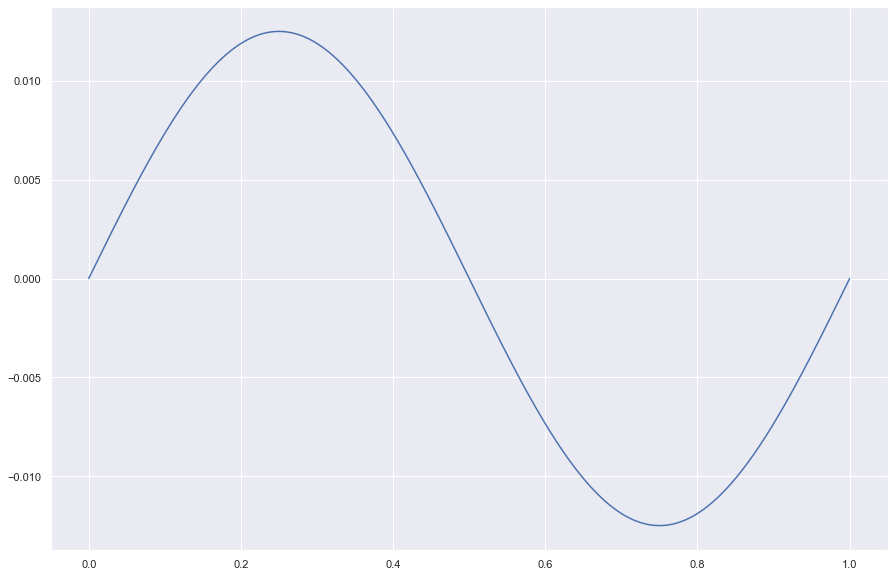

In [43]:
plt.plot(x, u_real)

### Метод циклической прогонки

Будем искать решение последней задачи в виде суммы двух сеточных функций, определенных на той же сетке {x$_{l}$}, что и сеточная функция $u^{(h)} = v^{(h)} + u_{0}w^{(h)}$. Получим еще 2 системы.

$$\bar{k}\frac{v_{l+1} - 2v_{l} + v_{l-1}}{h^{2}} - \bar{q}v_{l} = -\bar{f}_{l}$$<br>
$$v_{L} = v_{0} = 0$$

$$\bar{k}\frac{w_{l+1} - 2w_{l} + w_{l-1}}{h^{2}} - \bar{q}w_{l} = 0$$<br>
$$w_{l} = v_{0} = 1$$

Умножим обе задачи на $h^{2}$ и введем коэффициенты <br>
$$a_{l} = \bar{k}; b_{l} = -2\bar{k} - \bar{q}h^{2}; c_{l} = \bar{k}.$$ <br>
Тогда задачи примут вид

$$a_{l}v_{l+1} + b_{l}v_{l} + c_{l}v_{l-1} = -h^{2}\bar{f}_{l} $$<br>
$$v_{0} = v_{L} = 0$$

$$a_{l}w_{l+1} + b_{l}w_{l} + c_{l}w_{l-1} = 0 $$<br>
$$w_{0} = w_{L} = 1$$

Введем коэффициенты $d_{l} = -h^{2}f_{1}$ для первой системы и $d_{l} = 0$ для второй системы. В итоге получим

$$a_{0}v_{1} + b_{0}v_{0} = d_{0}; a_{0} = 0, b_{0} = 1, d_{0} = 0, v_{0} = 0$$<br>
$$a_{l}v_{l+1} + b_{l}v_{l} + c_{l}v_{L-1} = d_{l}$$ <br>
$$b_{L}v_{L} + c_{L}v_{L-1} = d_{L}; b_{L} = 1, c_{L} = 0, d_{L} = 0, v_{L} = 0$$<br>

$$a_{0}w_{1} + b_{0}w_{0} = d_{0}; a_{0} = 0, b_{0} = 1, d_{0} = 1$$<br>
$$a_{l}w_{l+1} + b_{l}w{l} + c_{l}w_{L-1} = d_{l}$$<br>
$$b_{L}w_{L} + c_{L}w_{L-1} = d_{L}; b_{L} = 1, c_{L} = 0, d_{L} = 1$$

Для того чтобы $u_{l} = v_{l} + u_{0}w_{l}$ необходимо

$$v_{L} + u_{0}w_{L} = u_{0}w_{L} = u_{0} $$ <br>
$$\bar{k}\frac{v_{1} + u_{0}w_{1} - 2u_{0} + v_{l-1} + u_{0}w_{L-1}}{h^{2}} - \bar{q}u_{0} = -\bar{f}_{0}$$

Получаем <br>
$$u_{0} = \frac{\bar{k}(v_{1} + v_{L - 1}) + \bar{f}_{0}h^{2}}{2\bar{k} + \bar{q}h^{2} - \bar{k}(w_{1} + w_{L-1})}$$

Для решения систем воспользуемся методом прогонки

In [44]:
v = np.zeros(N)
w = np.zeros(N)
    
w[0] = w[N-1] = 1
v[0] = v[N-1] = 0

In [45]:
a = np.ones(N) * k_bar
a[0] = 0
b = np.ones(N) * (-2 * k_bar - q_bar * h**2)
b[0] = 1
b[10] = 1
c = np.ones(N) * (k_bar)
c[10] = 0
d_1 = np.ones(N) *(-h**2 * f(x))
d_1[0] = 0
d_1[10] = 0
d_2 = np.zeros(N)
d_2[0] = 1
d_2[10] = 1

alpha = np.zeros(N)
alpha[0] = -a[0]/b[0]

beta_1 = np.zeros(N)
beta_1[0] = d_1[0]/b[0]

beta_2 = np.zeros(N)
beta_2[0] = d_2[0]/b[0]

for i in range(1, len(v)):
    alpha[i] = -a[i]/(b[i] + c[i] * alpha[i-1])
    beta_1[i] = (d_1[i] - c[i] * beta_1[i-1]) / (b[i] + c[i] * alpha[i-1])
    beta_2[i] = (d_2[i] - c[i] * beta_2[i-1]) / (b[i] + c[i] * alpha[i-1])


In [46]:
a ,b , c, d_1, d_2

(array([0., 2., 2., ..., 2., 2., 2.]),
 array([ 1.      , -4.000001, -4.000001, ..., -4.000001, -4.000001,
        -4.000001]),
 array([2., 2., 2., ..., 2., 2., 2.]),
 array([ 0.00000000e+00, -6.28314397e-09, -1.25660399e-08, ...,
         1.25660399e-08,  6.28314397e-09,  2.44929360e-22]),
 array([1., 0., 0., ..., 0., 0., 0.]))

In [47]:
alpha, beta_1, beta_2

(array([-0.        ,  0.49999988,  0.66666639, ...,  0.99882885,
         0.99882972,  0.99883059]),
 array([ 0.00000000e+00,  1.57078560e-09,  5.23586818e-09, ...,
        -7.94531064e-05, -7.93632619e-05, -7.92704537e-05]),
 array([1.00000000e+00, 4.99999875e-01, 3.33333111e-01, ...,
        3.11302030e-04, 3.10937720e-04, 3.10574106e-04]))

In [48]:
v[N-1] = (d_1[N-1] - c[N-1] * beta_1[N-2])/(b[N-1] + c[N-1] * alpha[N-2])
w[N-1] = (d_2[N-1] - c[N-1] * beta_2[N-2])/(b[N-1] + c[N-1] * alpha[N-2])

Обратная прогонка

In [49]:
def gr(v, alpha, beta):
    for i in range(len(v) - 2, 0, -1):
        v[i] = alpha[i] * v[i+1] + beta[i]
    return v

In [50]:
gr(v, alpha, beta_1)

array([ 0.00000000e+00, -5.23599254e-06, -1.04751293e-05, ...,
       -2.37808378e-04, -1.58540947e-04, -7.92704537e-05])

In [51]:
gr(w, alpha, beta_2)

array([1.00000000e+00, 9.33357627e-01, 8.66715722e-01, ...,
       9.31722939e-04, 6.21148367e-04, 3.10574106e-04])

In [52]:
u_0 = (k_bar * (v[1] + v[N-2]) + f(0) * h**2) / (2 * k_bar + q_bar * h**2 - k_bar * (w[1] + w[N-2]))

In [53]:
u_0

-0.00015363377291795972

In [54]:
u = v + u_0 * w

In [55]:
u

array([-1.53633773e-04, -1.48631246e-04, -1.43631936e-04, ...,
       -2.37951522e-04, -1.58636376e-04, -7.93181683e-05])

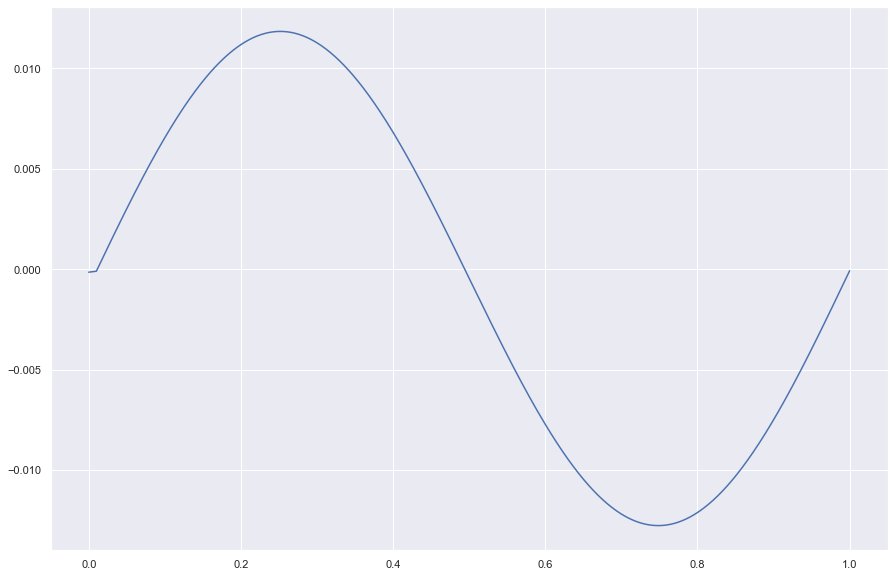

In [56]:
plt.plot(x, u)

### Численное решение разностной задачи с переменными коэффициентами

На той же сетке в начальном ДУ заменим производные конечно-разностными отношениями <br>
$$k(x_{l} \pm h/2) = k_{l \pm 1/2}$$ <br>
$$q(x_{l}) = q_{l}; f(x_{l}) = f_{l} $$ <br>
$$[\frac{d}{dx}k(x)\frac{du}{dx}](x \approx x_{l}) \approx \frac{k_{l + 1/2}\frac{u_{l+1} - u_{l}}{h} - k_{l - 1/2}\frac{u_{l} - u_{l-1}}{h}}{h}$$

Введем обозначения $a_{l} = k_{l + 1/2}; b_{l} = -(k_{l + 1/2} + k_{l - 1/2} + q_{l}h^{2}); c_{l} = k_{l - 1/2}; d_{l} = -f_{l}h^{2}$

$$a_{l}u_{l+1} + b_{l}u_{l} + c_{l}u_{l-1} = d_{l}$$ <br>
$$u_{0} = u_{L}$$ <br>
$$k_{1/2}u_{1} - (k_{L-1/2} + k_{1/2} + q_{0}h^{2})u_{0} + k_{L-1/2}u_{L-1} = -f_{0}h^{2}$$

Аналогично прошлому пункту, $u_{l} = v_{l} + u_{0}w_{l}$

$$a_{l}v_{l+1} + b_{l}v_{l} + c_{l}v_{l-1} = d_{l}$$<br>
$$v_{0} = v_{L} = 0$$ <br> <br>
$$a_{l}w_{l+1} + b_{l}w_{l} + c_{l}w_{l-1} = 0$$<br>
$$v_{0} = v_{L} = 1$$

$$u_{0} = \frac{k_{1/2}v_{1} + k_{L - 1/2}v_{L-1} + f_{0}h^{2}}{k_{1/2} + k_{L-1/2} + q_{0}h^{2} - k_{1/2}w_{1} - k_{L-1/2}w_{L-1}}$$


In [57]:
A = k(x + h/2)
B = -(k(x + h/2) + k(x - h/2) + q(x) * h**2)
C = k(x - h/2)
D_1 = -f(x) * h**2
D_2 = np.zeros(N)

In [58]:
A, B, C, D_1, D_2

(array([1.99999013, 1.99991118, 1.99975328, ..., 1.99991118, 1.99999013,
        1.99999013]),
 array([-3.99998126, -3.99990231, -3.99966546, ..., -3.99966546,
        -3.99990231, -3.99998126]),
 array([1.99999013, 1.99999013, 1.99991118, ..., 1.99975328, 1.99991118,
        1.99999013]),
 array([-0.00000000e+00, -6.28314397e-09, -1.25660399e-08, ...,
         1.25660399e-08,  6.28314397e-09,  2.44929360e-22]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [59]:
V = np.zeros(N)
V[0] = V[N-1] = 0
W = np.zeros(N)
W[0] = W[N-1] = 1

In [60]:
A[0] = 0
B[0] = 1
D_1[0] = 0 
B[N-1] = 1
C[N-1] = 0
D_1[N-1] = 0

D_2[0] = 1
D_2[N-1] = 1

In [61]:
alpha_ = np.zeros(N)
alpha_[0] = -A[0]/B[0]

beta_1_ = np.zeros(N)
beta_1_[0] = D_1[0]/B[0]

beta_2_ = np.zeros(N)
beta_2_[0] = D_2[0]/B[0]

for i in range(1, len(V)):
    alpha_[i] = -A[i]/(B[i] + C[i] * alpha_[i-1])
    beta_1_[i] = (D_1[i] - C[i] * beta_1_[i-1]) / (B[i] + C[i] * alpha_[i-1])
    beta_2_[i] = (D_2[i] - C[i] * beta_2_[i-1]) / (B[i] + C[i] * alpha_[i-1])


In [62]:
gr(V, alpha_, beta_1_)

array([ 0.00000000e+00,  7.84350139e-05,  1.56870022e-04, ...,
       -1.56870022e-04, -7.84350139e-05,  0.00000000e+00])

In [63]:
gr(W, alpha_, beta_2_)

array([1.        , 0.99976332, 0.99952713, ..., 0.99952713, 0.99976332,
       1.        ])

In [64]:
U_0 = (k(h/2) * V[1] + k(x[N-1] - h/2) * V[N-2] + f(0) * h**2) / (k(h/2) + k(x[N-1] - h/2) + q(0) * h**2 - k(h/2) * W[1] - k(x[N-1] - h/2) * W[N-2])

In [65]:
U = V + U_0 * W

In [66]:
U

array([ 1.85901960e-14,  7.84350139e-05,  1.56870022e-04, ...,
       -1.56870022e-04, -7.84350139e-05,  1.85901960e-14])

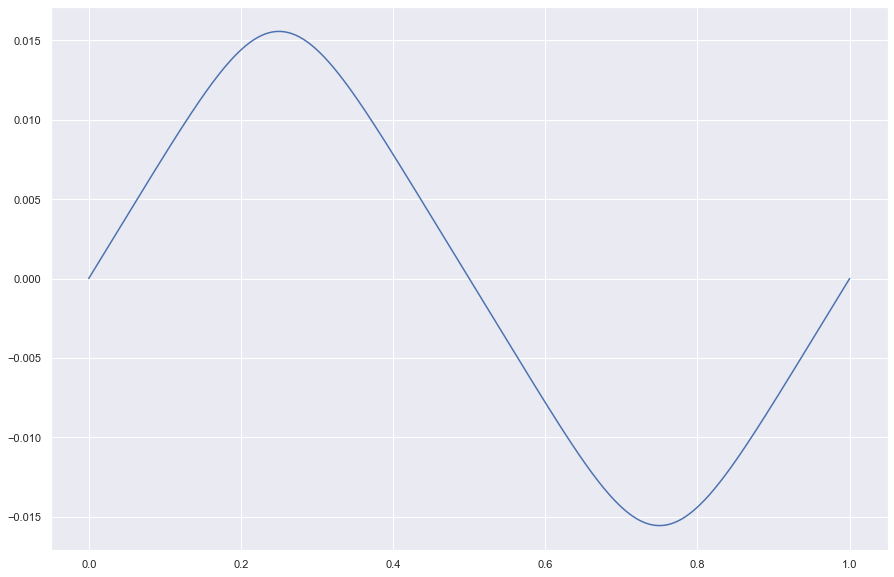

In [67]:
plt.plot(x, U)

Сравнение

Text(0, 0.5, 'u')

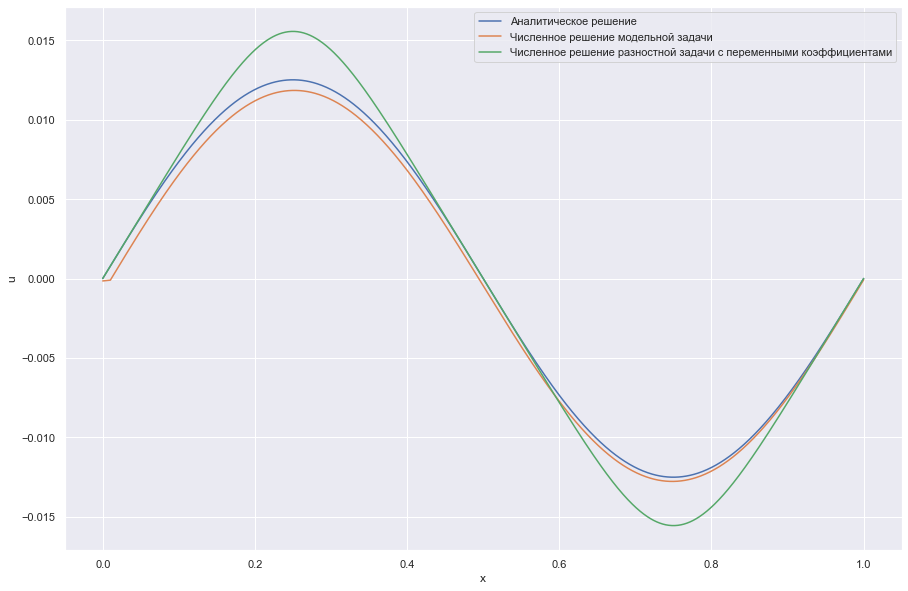

In [68]:
plt.plot(x, u_real, label = 'Аналитическое решение')
plt.plot(x, u, label = 'Численное решение модельной задачи')
plt.plot(x, U, label = 'Численное решение разностной задачи с переменными коэффициентами')

plt.legend()
plt.xlabel('x')
plt.ylabel('u')

In [69]:
sigma_1 = []
sigma_2 = []
for i in range(len(u)):
    sigma_1.append(abs(u_real[i] - u[i]))
    sigma_2.append(abs(u_real[i] - U[i]))

In [70]:
sigma_1

[0.00015363377291795972,
 0.00022721294542596646,
 0.00030079223155065195,
 0.000374371668091865,
 0.00044795129184952885,
 0.0005215311396236589,
 0.0005951112482143811,
 0.0006686916544219498,
 0.0007422723950467657,
 0.0008158535068893941,
 0.000889435026750582,
 0.0008884683278683497,
 0.00088750207333246,
 0.0008865362626699644,
 0.0008855708954081326,
 0.0008846059710744501,
 0.0008836414891966195,
 0.0008826774493025564,
 0.0008817138509203933,
 0.0008807506935784744,
 0.0008797879768053593,
 0.0008788257001298187,
 0.0008778638630808353,
 0.0008769024651876048,
 0.0008759415059795318,
 0.0008749809849862319,
 0.00087402090173753,
 0.0008730612557634602,
 0.0008721020465942639,
 0.0008711432737603915,
 0.0008701849367924984,
 0.0008692270352214486,
 0.0008682695685783106,
 0.000867312536394357,
 0.0008663559382010662,
 0.0008653997735301208,
 0.0008644440419134046,
 0.0008634887428830055,
 0.0008625338759712131,
 0.0008615794407105175,
 0.0008606254366336111,
 0.0008596718632733

In [71]:
sigma_2

[1.8590195957476455e-14,
 1.4668516411551558e-07,
 2.902740422697377e-07,
 4.276708001864219e-07,
 5.557806000496164e-07,
 6.715100711971876e-07,
 7.717677998227948e-07,
 8.534648192354971e-07,
 9.135151008172072e-07,
 9.488360458169594e-07,
 9.563489781209055e-07,
 9.329796381407195e-07,
 8.756586779562611e-07,
 7.813221578544752e-07,
 6.469120444056904e-07,
 4.6937671021717725e-07,
 2.4567143550079454e-07,
 2.7241088404114655e-08,
 3.5239025340219783e-07,
 7.327970267848819e-07,
 1.1714734409874836e-06,
 1.6714220808316214e-06,
 2.2356355681022247e-06,
 2.867096043325133e-06,
 3.5687746446023873e-06,
 4.343630983361883e-06,
 5.194612616877831e-06,
 6.124654517432153e-06,
 7.136678537958494e-06,
 8.233592874035741e-06,
 9.418291522102652e-06,
 1.0693653733717754e-05,
 1.2062543465760425e-05,
 1.3527808826410519e-05,
 1.5092281516765598e-05,
 1.6758776267960466e-05,
 1.853009027365368e-05,
 2.0409002617721456e-05,
 2.2398273697031915e-05,
 2.4500644639165615e-05,
 2.6718836714924137e-0

In [72]:
df = pd.DataFrame(np.array([x, u_real, u, U, sigma_1, sigma_2]))
df.insert(0, 'Name', ['$x_{i}$', '$u_{an}$', '$u_{comp}$', '$u_{var}$', '$\Delta_{com}$', '$\Delta_{var}$'])

df.style.set_caption('Таблица 1. Значения сеточных функций аналитического,численного решений модельной задачи и численного решения для задачи с переменными коэф. в некоторых узлах сетки').hide_index()

### Вывод:
все решения были получены, заданная точность достигнута <br>
на последовательно удваиваемых сетках численное решение задачи с переменными коэффициентами все больше приближается к аналитическому решению модельной задачи, то есть сходится<br>
при количестве точек более 100 численное решение задачи с постоянными коэффциентами полностю совпадает с аналитическим решением модельной задачи